# Question 1

The Bias-Variance trade-off is a phenomena that occurs in machine learning where bias and variance are in the expected error and when decreasing one you increase the other. The bias problem is when the hypothesis space in a classification method doesn't include enough hypotheses, meaning that it is underfitting the model. The variance problem is when the hypothesis space is too large for the training data and the selected hypothesis isn't accurate on unseen data, meaning that the model is too complex and is overfitting the training data. When decreasing the bias, variance increases and vice versa making it difficult to modify the model to the smallest error. There are no analytical methods to find the optimal bias-variance trade-off, but there are techniques to reduce bias and variance. One way to reduce bias in a model is to increase the hypothesis space, increasing the number of hypotheses in the hypothesis space will make the model more complex. This will reduce bias and reduce underfitting the model. Some ways to reduce variance are through resampling methods. For example, using the bagging method that resamples the training data with replacement to increase the number of decision trees will help decrease variance. Averaging many trees in a classification model will generally decrease the variance and help generalize the model.

# Question 2

In [281]:
precision = 50/(50+40)
round(precision, 3)

0.556

In [282]:
recall = 50/(50+30)
round(recall, 3)

0.625

In [283]:
F1_score = (2*(precision*recall))/(precision+recall)
round(F1_score, 3)

0.588

# Question 3

In [284]:
import matplotlib.image as mpimg

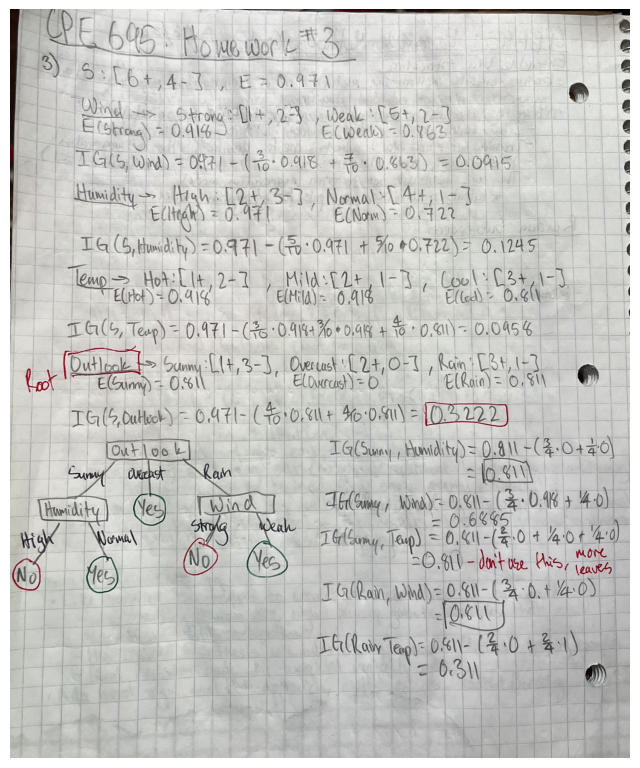

In [285]:
pix = mpimg.imread("Question_3.jpg")

plt.figure(figsize=(8,16))
plt.axis('off')
plt.imshow(pix)
plt.show()

# Question 4

Class 1

In [286]:
p1 = 40/70
p2 = 20/40
p3 = 0/10
C1 = p1*p2*p3
C1

0.0

Class 2

In [287]:
P1 = 30/70
P2 = 20/40
P3 = 10/10
C2 = P1*P2*P3
round(C2, 3)

0.214

Based on the Naive Baye's ensemble method, the predictions, and the 3 confusion matrices for the classifiers we can predict that this will be Class 2.

# Question 5

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn.tree as tree
np.random.seed(42)

STEP 1

In [289]:
data = pd.read_csv("Titanic.csv")
data.head(5)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [290]:
data.isnull().any(axis=0)

Unnamed: 0    False
pclass        False
survived      False
name          False
sex           False
age            True
sibsp         False
parch         False
ticket        False
fare           True
cabin          True
embarked       True
boat           True
body           True
home.dest      True
dtype: bool

In [291]:
#Can't fill boat column with mean, median, or mode because there are strings in that column along with integers
data.age.fillna(data.age.mean(), inplace=True)
data.fare.fillna(data.fare.mean(), inplace = True)
data.body.fillna(data.body.mean(), inplace = True)
data.replace({"1st": 1, "2nd": 2, "3rd": 3}, inplace = True)
data.replace({"male": 1, "female": 0}, inplace = True)

In [292]:
#Want X to contain entire dataframe except for the target variable
X = data[["pclass", "sex", "age", "sibsp"]].values
y = data["survived"].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

STEP 2

In [293]:
tree_clf = DecisionTreeClassifier(random_state=100)
titanic = tree_clf.fit(X_train, y_train)

[Text(0.39521141174121405, 0.975, 'sex <= 0.5\ngini = 0.474\nsamples = 1047\nvalue = [642, 405]\nclass = 0'),
 Text(0.19047024760383385, 0.925, 'pclass <= 2.5\ngini = 0.382\nsamples = 377\nvalue = [97, 280]\nclass = 1'),
 Text(0.051916932907348244, 0.875, 'pclass <= 1.5\ngini = 0.129\nsamples = 202\nvalue = [14, 188]\nclass = 1'),
 Text(0.019169329073482427, 0.825, 'age <= 8.0\ngini = 0.053\nsamples = 111\nvalue = [3, 108]\nclass = 1'),
 Text(0.012779552715654952, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.025559105431309903, 0.775, 'age <= 62.5\ngini = 0.036\nsamples = 110\nvalue = [2, 108]\nclass = 1'),
 Text(0.012779552715654952, 0.725, 'age <= 35.5\ngini = 0.019\nsamples = 105\nvalue = [1, 104]\nclass = 1'),
 Text(0.006389776357827476, 0.675, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = 1'),
 Text(0.019169329073482427, 0.675, 'age <= 36.5\ngini = 0.041\nsamples = 48\nvalue = [1, 47]\nclass = 1'),
 Text(0.012779552715654952, 0.625, 'sibsp <= 0.5\ngi

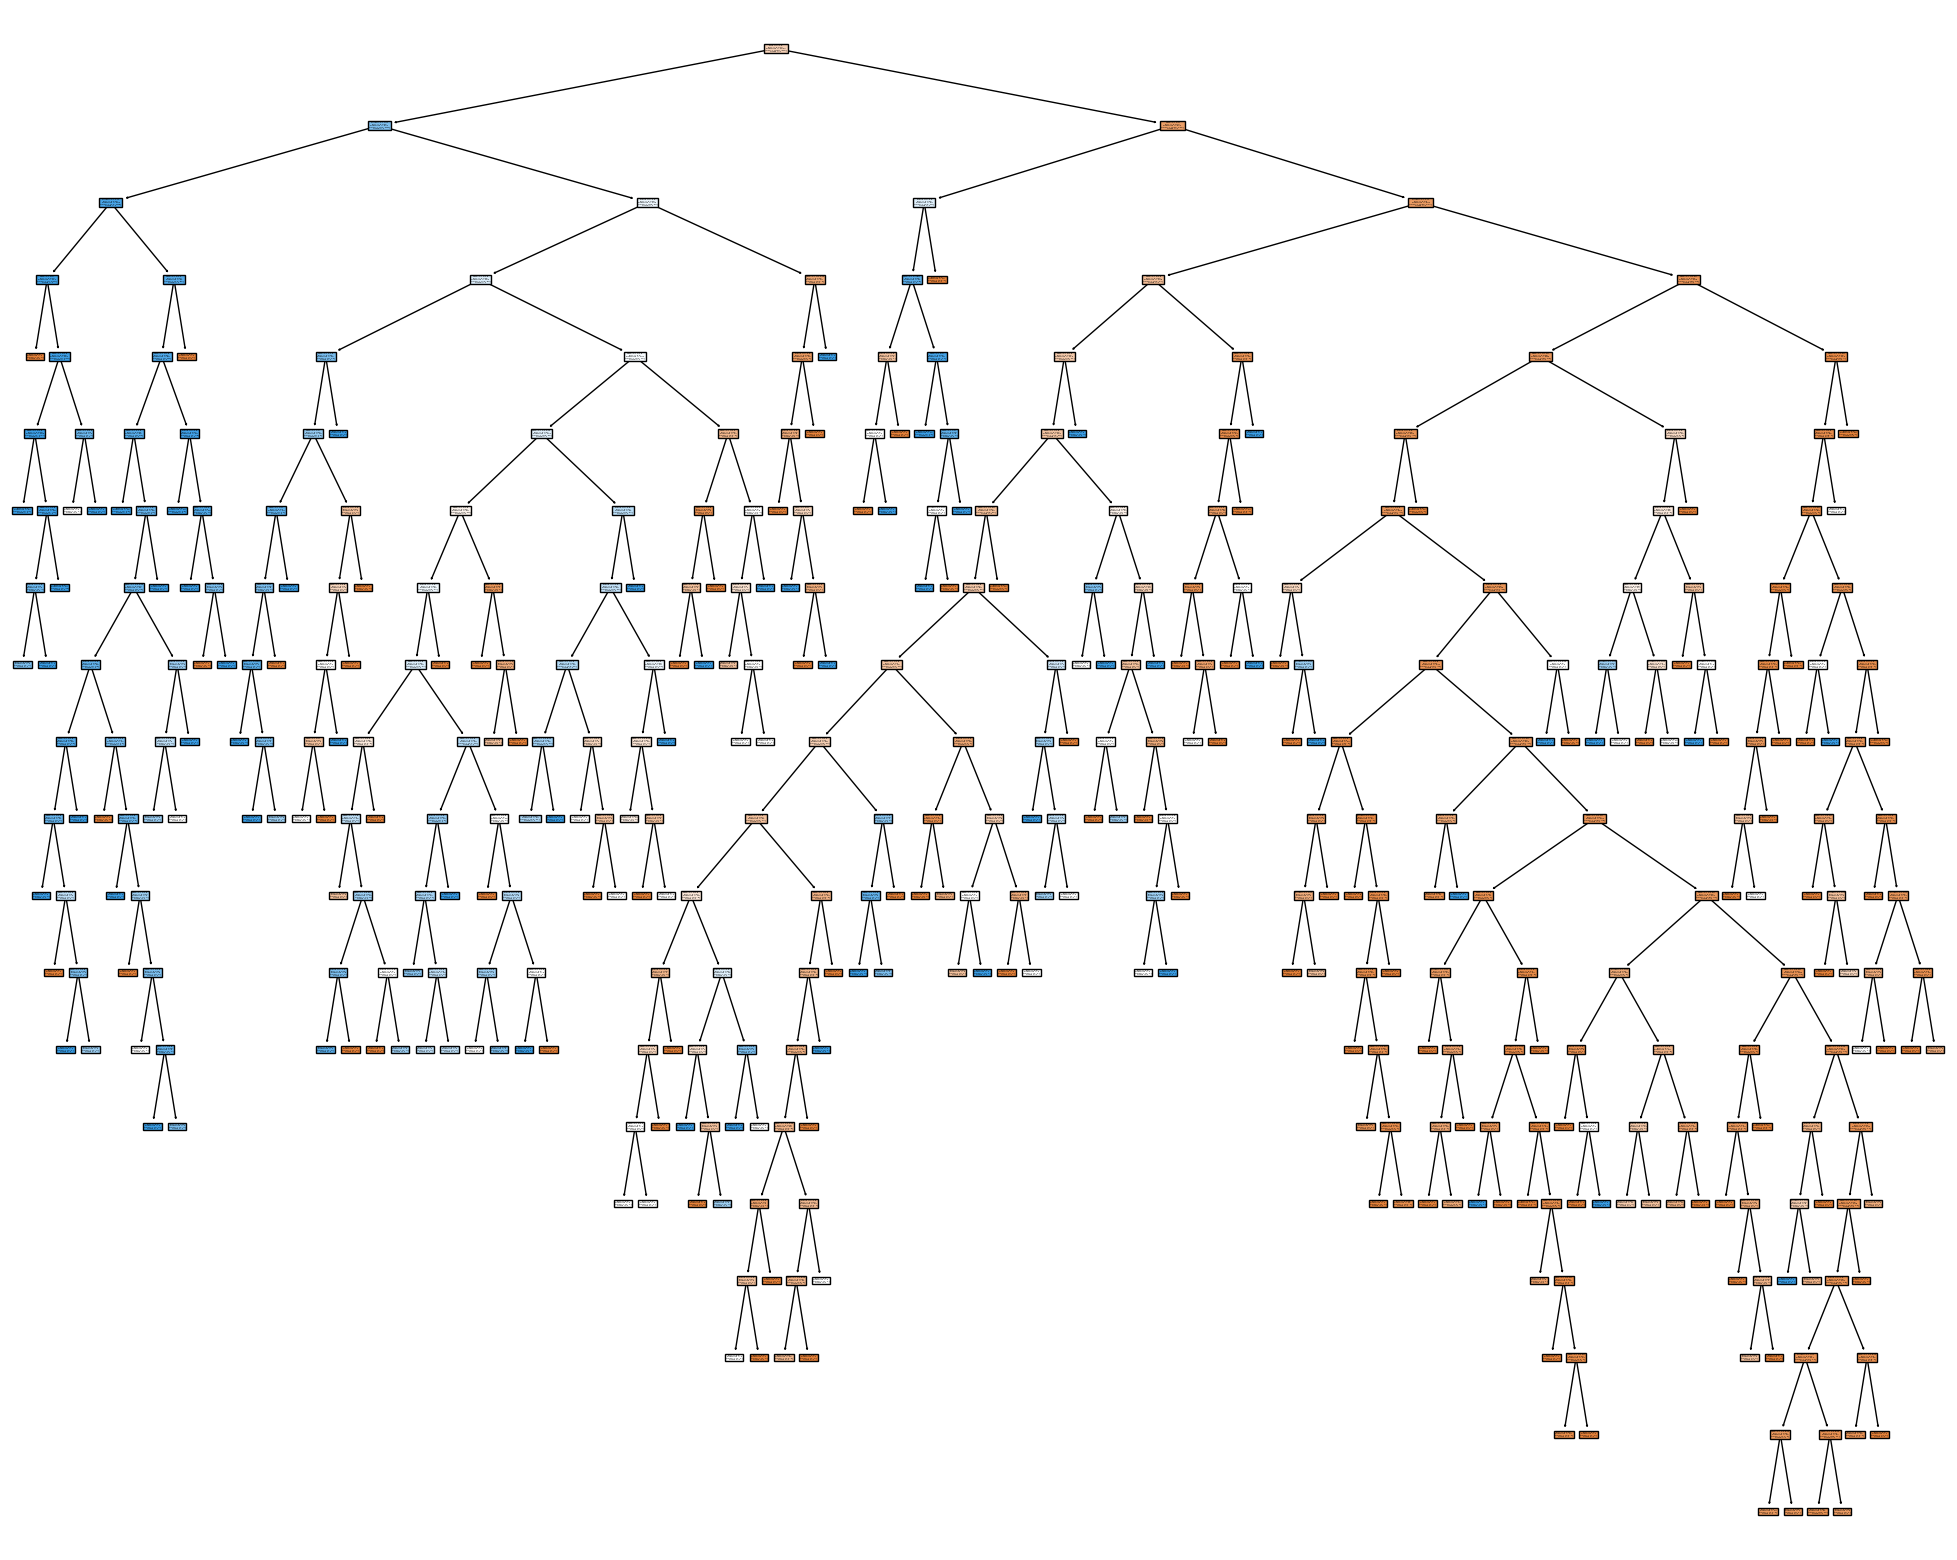

In [294]:
fn = ["pclass", "sex", "age", "sibsp"]
cn = ["0", "1"]
fig = plt.figure(figsize=(25,20))
tree.plot_tree(titanic, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

STEP 3

In [295]:
param_grid = {
 "max_depth":[5,10,20,],
 "min_samples_split":[20,40,60,80],
 "min_impurity_decrease": [0.0001, 0.0005, 0.001, 0.005, 0.01],
    "max_leaf_nodes": [10, 20, 30, 40]
}

gridSearch = GridSearchCV(tree_clf, param_grid, cv = 5, n_jobs = 1)
initial = gridSearch.fit(X_train, y_train)

In [296]:
print("Initial Score: ", gridSearch.best_score_)
print("Initial Parameters: ", gridSearch.best_params_)

Initial Score:  0.7946684894053315
Initial Parameters:  {'max_depth': 5, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}


In [297]:
new_param = {
    "max_depth": list(range(3,10)),
    "max_leaf_nodes": list(range(15, 25)),
    "min_samples_split": list(range(10, 35)),
    "min_impurity_decrease": [0.00001, 0.00005, 0.0001]
}

improveSearch = GridSearchCV(tree_clf, new_param, cv = 5, n_jobs = -1)
improved = improveSearch.fit(X_train, y_train)

In [298]:
print("Improved Score: ", improveSearch.best_score_)
print("Improved Parameters: ", improveSearch.best_params_)

Improved Score:  0.7965823650034176
Improved Parameters:  {'max_depth': 5, 'max_leaf_nodes': 18, 'min_impurity_decrease': 1e-05, 'min_samples_split': 12}


In [299]:
best_tree = improveSearch.best_estimator_
titanic_best = best_tree.fit(X_train, y_train)

[Text(0.41964285714285715, 0.9166666666666666, 'sex <= 0.5\ngini = 0.474\nsamples = 1047\nvalue = [642, 405]\nclass = 0'),
 Text(0.16964285714285715, 0.75, 'pclass <= 2.5\ngini = 0.382\nsamples = 377\nvalue = [97, 280]\nclass = 1'),
 Text(0.07142857142857142, 0.5833333333333334, 'pclass <= 1.5\ngini = 0.129\nsamples = 202\nvalue = [14, 188]\nclass = 1'),
 Text(0.03571428571428571, 0.4166666666666667, 'gini = 0.053\nsamples = 111\nvalue = [3, 108]\nclass = 1'),
 Text(0.10714285714285714, 0.4166666666666667, 'gini = 0.213\nsamples = 91\nvalue = [11, 80]\nclass = 1'),
 Text(0.26785714285714285, 0.5833333333333334, 'sibsp <= 2.5\ngini = 0.499\nsamples = 175\nvalue = [83, 92]\nclass = 1'),
 Text(0.17857142857142858, 0.4166666666666667, 'age <= 16.5\ngini = 0.495\nsamples = 162\nvalue = [73, 89]\nclass = 1'),
 Text(0.10714285714285714, 0.25, 'age <= 14.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = 1'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.432\nsamples = 19\nval

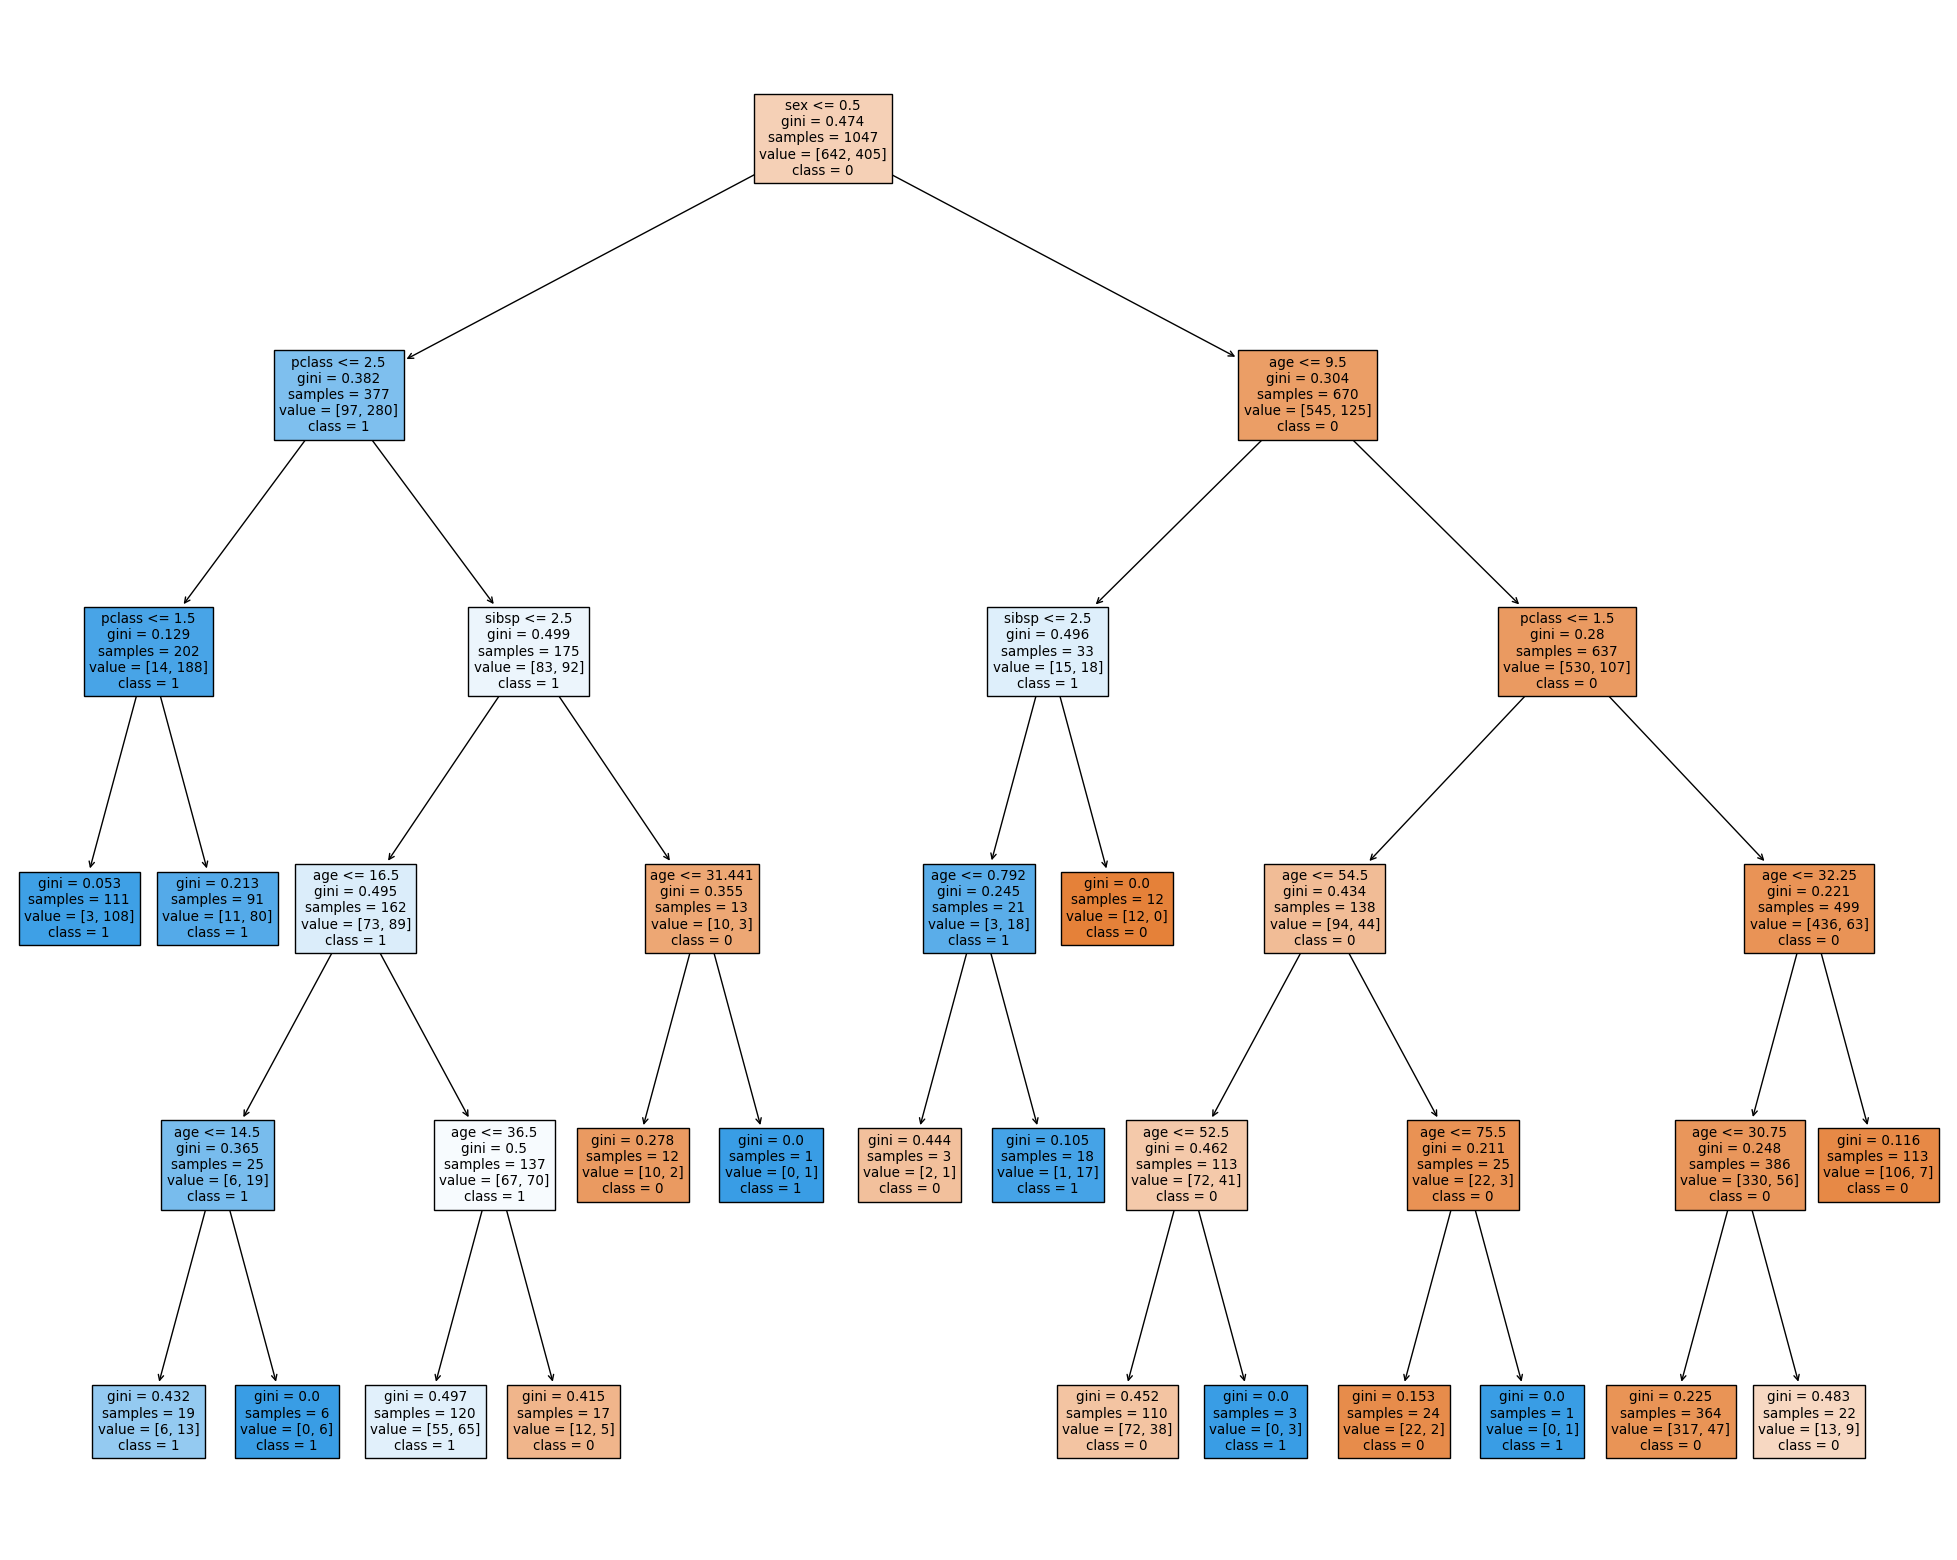

In [300]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(titanic_best, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

STEP 4

In [301]:
y_pred = titanic_best.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7862595419847328


In [302]:
#Percent Survivors and Fatalities Correctly Predicted
survived = metrics.accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatalities = metrics.accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
print("Percent Survivors Correctly Predicted: ", survived)
print("Percent Fatalities Correctly Predicted: ", fatalities)

Percent Survivors Correctly Predicted:  0.6631578947368421
Percent Fatalities Correctly Predicted:  0.8562874251497006


STEP 5

In [303]:
np.random.seed(42)
forest_clf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 18)
titanic_forest = forest_clf.fit(X_train, y_train)

In [304]:
y_pred1 = forest_clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred1))

Accuracy:  0.7977099236641222


In [305]:
#Percent Survivors and Fatalities Correctly Predicted
survive = metrics.accuracy_score(y_test[y_test == 1], y_pred1[y_test == 1])
fatal = metrics.accuracy_score(y_test[y_test == 0], y_pred1[y_test == 0])
print("Percent Survivors Correctly Predicted: ", survive)
print("Percent Fatalities Correctly Predicted: ", fatal)

Percent Survivors Correctly Predicted:  0.6526315789473685
Percent Fatalities Correctly Predicted:  0.8802395209580839
